<a href="https://colab.research.google.com/github/AgnosticRohan/CodSoft/blob/main/Task_5_CCFD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CREDIT CARD FRAUD DETECTION**

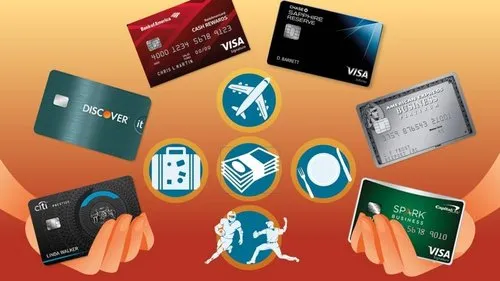

# **Build a machine learning model to identify fraudulent credit card transactions.**
# **Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets. Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine. Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results**

# **Data Gathering and Understanding**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Creditcard = pd.read_csv('/content/drive/MyDrive/creditcard[1].csv')

In [ ]:
Creditcard.shape

(284807, 31)

In [ ]:
Creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
Creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
Creditcard.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
Creditcard.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# **Data Cleaning**

In [ ]:
Creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
Creditcard.drop_duplicates(inplace=True)

# **Data Pre-Processing and Statistical Analysis**

In [ ]:
Creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# **Data Visualization**

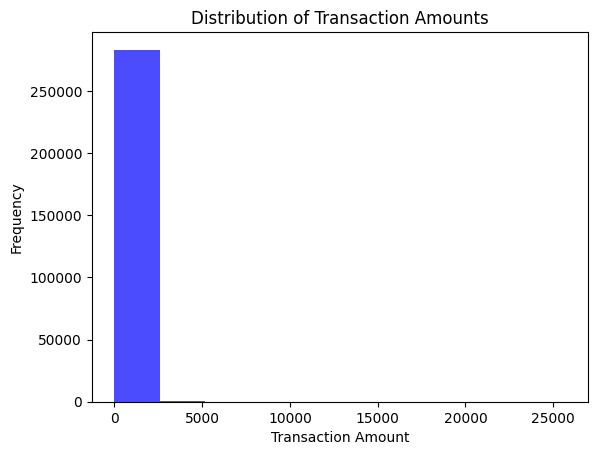

Amount
1.00        13566
1.98         6044
0.89         4871
9.99         4738
15.00        3280
            ...  
268.99          1
269.12          1
269.15          1
269.16          1
25691.16        1
Name: count, Length: 32767, dtype: int64

In [ ]:
#DISTRIBUTION OF AMOUNT
plt.hist(Creditcard['Amount'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()
Creditcard.value_counts('Amount')

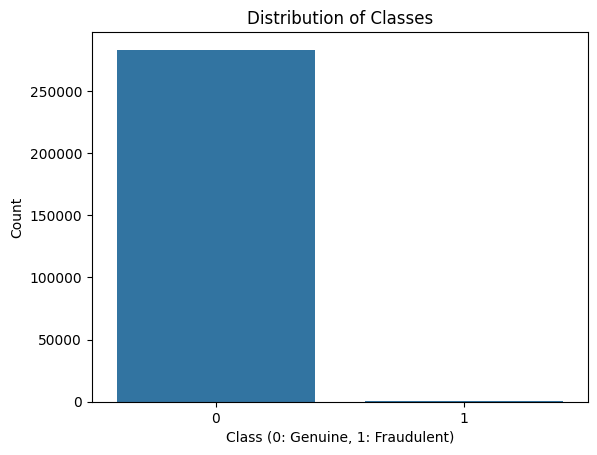

Class
0    283253
1       473
Name: count, dtype: int64

In [ ]:
#DISTRIBUTIN OF CLASS FRAUDULENT OR GENUINE
sns.countplot(x='Class', data=Creditcard)
plt.xlabel('Class (0: Genuine, 1: Fraudulent)')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()
Creditcard.value_counts('Class')

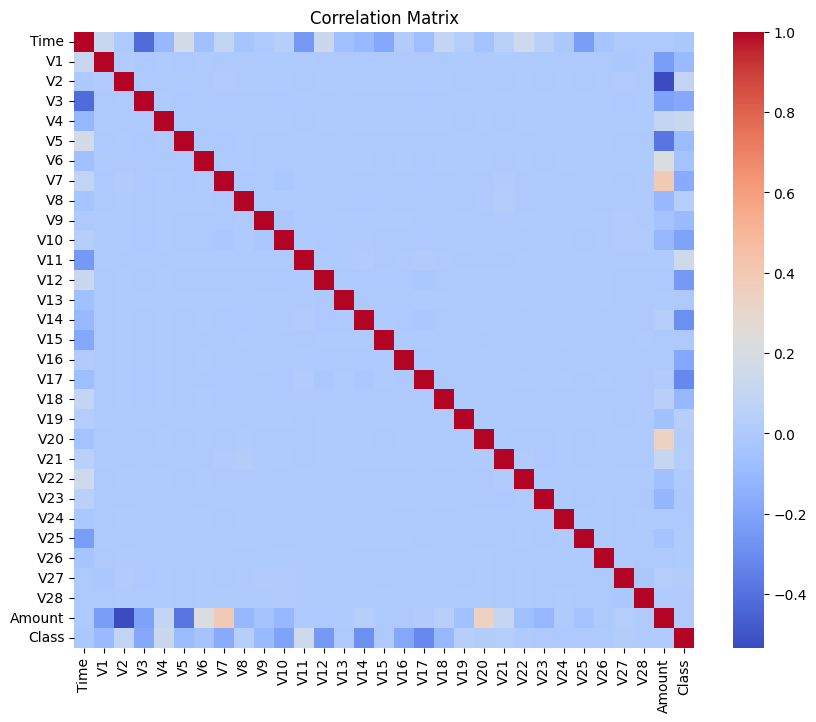

In [ ]:

plt.figure(figsize=(10, 8))
sns.heatmap(Creditcard.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

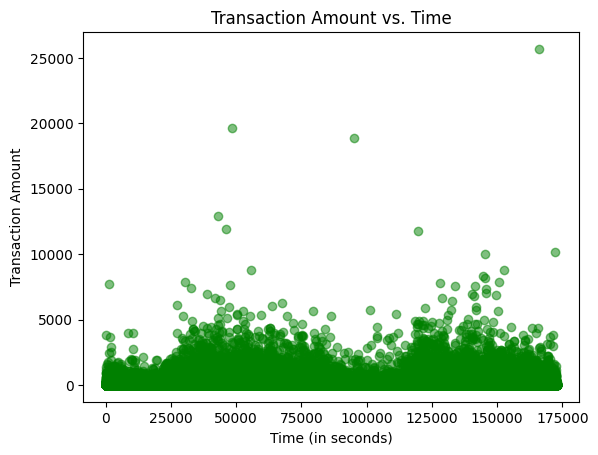

In [ ]:
#DISTRIBUTION OF TRANSACTION AMOUNT VS TIME
plt.scatter(Creditcard['Time'], Creditcard['Amount'], color='green', alpha=0.5)
plt.xlabel('Time (in seconds)')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Time')
plt.show()


# **Splitting Data into Training and Testing**
# **Training Model**

In [ ]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
Creditcard['Amount'] = scaler.fit_transform(Creditcard[['Amount']])

In [ ]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']
X = Creditcard[features]
Y = Creditcard['Class']

In [ ]:
print(X)

               V1         V2        V3        V4        V5    Amount
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.244200
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.342584
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.158900
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  0.139886
4       -1.158233   0.877737  1.548718  0.403034 -0.407193 -0.073813
...           ...        ...       ...       ...       ...       ...
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -0.350252
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229 -0.254325
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515 -0.082239
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961 -0.313391
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546  0.513290

[283726 rows x 6 columns]


In [ ]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
print( 'X_test' , X_test.shape)
print('X_train', X_train.shape)

X_test (56746, 6)
X_train (226980, 6)


In [ ]:
print(X_test)
print(X_train)

              V1        V2        V3        V4        V5    Amount
86568   1.228821 -0.063408  0.274145  0.647465 -0.048135 -0.307400
251557 -0.203154  1.176678 -0.759595 -0.518472  0.629649 -0.345579
20232  -1.672836  1.401297  1.503940  2.175491  0.699791  0.011211
68952   0.819379 -1.124913  0.515025  0.513945 -1.009048  0.557220
191852  2.009701  0.105635 -1.752759  0.588312  0.374801 -0.347696
...          ...       ...       ...       ...       ...       ...
56516  -1.162452  0.795672  1.953356  1.654216  1.069023 -0.345340
188431 -2.023289  2.214345 -2.097511 -1.041892 -0.120896 -0.313431
115561  1.180651 -0.199219  1.233565  0.869184 -1.138767 -0.316825
187644  2.061059  0.136698 -1.830805  0.206364  0.705093 -0.349773
8267    1.247134  0.061041  0.888561  0.317248 -0.756993 -0.289629

[56746 rows x 6 columns]
              V1        V2        V3        V4        V5    Amount
226238  2.238954 -1.724499 -2.151484 -2.577803  0.993668 -0.225531
134253 -1.315062  1.630783  0.597001

In [ ]:
print( 'Y_test' , Y_test.shape)
print('Y_train', Y_train.shape)

Y_test (56746,)
Y_train (226980,)


In [ ]:
print(Y_test)
print(Y_train)

86568     0
251557    0
20232     0
68952     0
191852    0
         ..
56516     0
188431    0
115561    0
187644    0
8267      0
Name: Class, Length: 56746, dtype: int64
226238    0
134253    0
186465    0
149493    0
18461     0
         ..
225116    0
3525      0
242674    0
60594     0
67057     0
Name: Class, Length: 226980, dtype: int64


In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [ ]:
Y_pred_lr = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Logistic Regression:")
print(classification_report(Y_test, Y_pred_lr))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56651
           1       0.03      0.86      0.05        95

    accuracy                           0.94     56746
   macro avg       0.51      0.90      0.51     56746
weighted avg       1.00      0.94      0.97     56746



In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [ ]:
rf_model.fit(X_train_resampled, Y_train_resampled)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
Y_pred_rf = rf_model.predict(X_test)

In [ ]:
print("\nRandom Forest:")
print(classification_report(Y_test, Y_pred_rf))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.82      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.90      0.54     56746
weighted avg       1.00      0.97      0.98     56746



# **Classification Report**

In [ ]:

print("Logistic Regression:")
print(classification_report(Y_test, Y_pred_lr))

print("\nRandom Forest:")
print(classification_report(Y_test, Y_pred_rf))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56651
           1       0.03      0.86      0.05        95

    accuracy                           0.94     56746
   macro avg       0.51      0.90      0.51     56746
weighted avg       1.00      0.94      0.97     56746


Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.82      0.09        95

    accuracy                           0.97     56746
   macro avg       0.52      0.90      0.54     56746
weighted avg       1.00      0.97      0.98     56746

